In [1]:
!git clone https://github.com/kmrasmussen/pythia_tools.git pythia_tools
!pip install -e pythia_tools --quiet
!pip install git+https://github.com/neelnanda-io/TransformerLens.git --quiet

Cloning into 'pythia_tools'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 88 (delta 19), reused 44 (delta 12), pack-reused 34
Unpacking objects: 100% (88/88), 57.72 MiB | 10.78 MiB/s, done.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 99.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 102.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.0 

In [7]:
import torch
import sys
sys.path.append("pythia_tools")
from pythia_tools.models import get_model, yield_models, get_n_layers
from pythia_tools.visualization import hist_and_box

70m 0


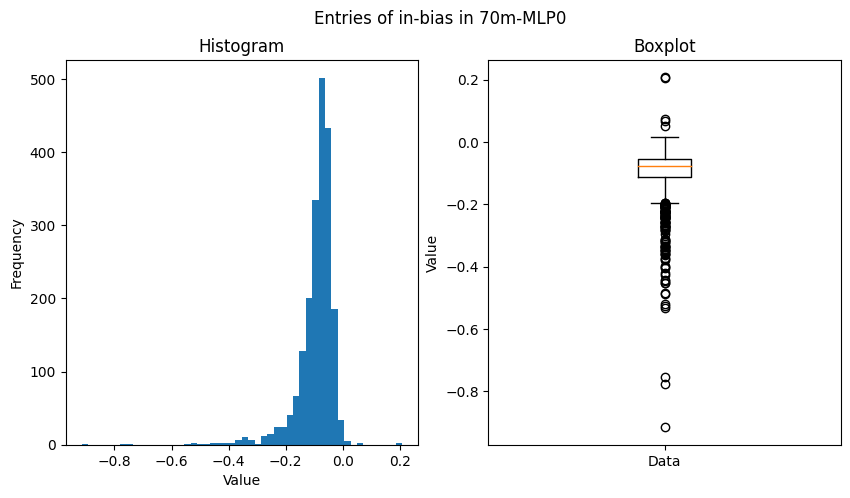

70m 1


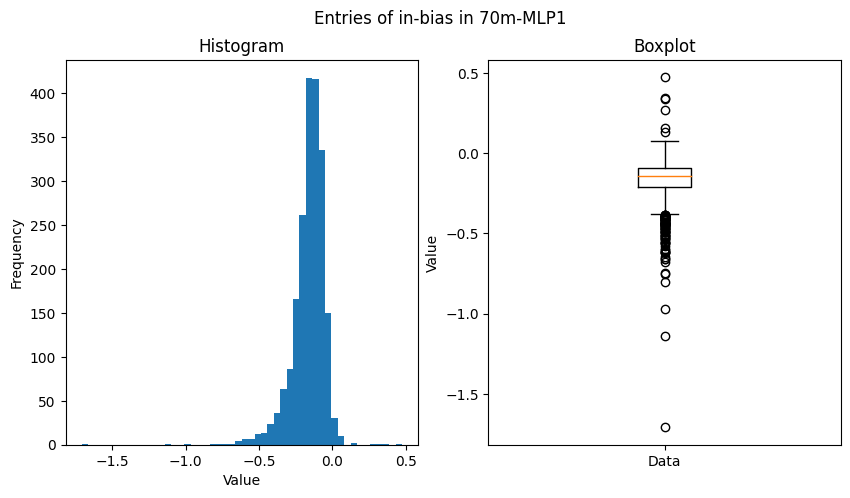

70m 2


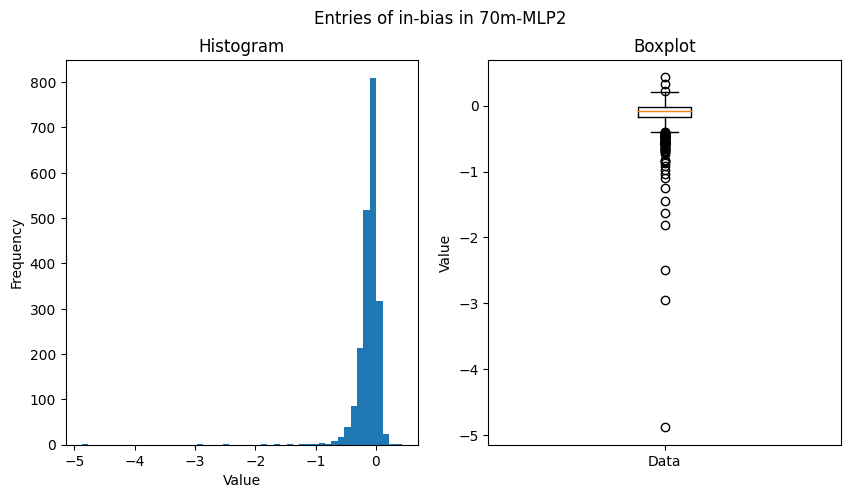

70m 3


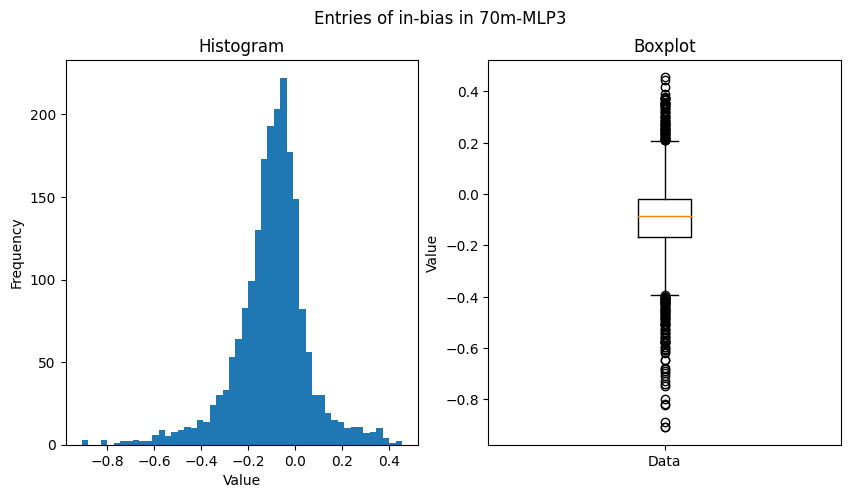

70m 4


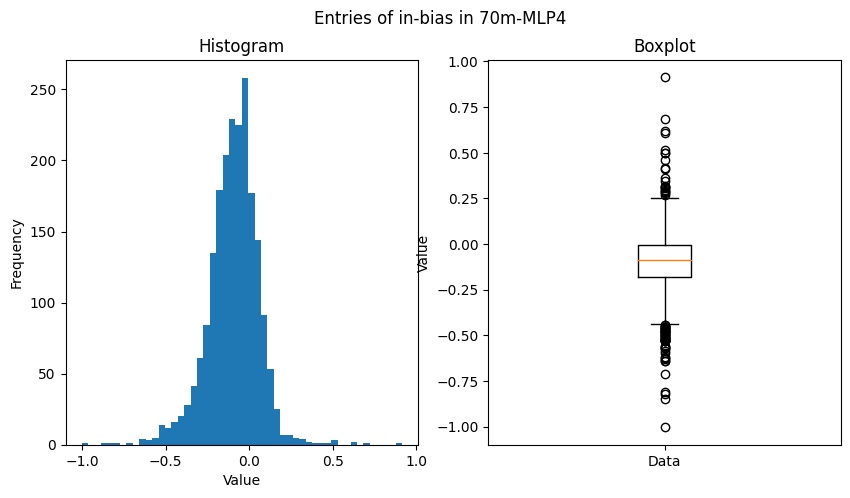

70m 5


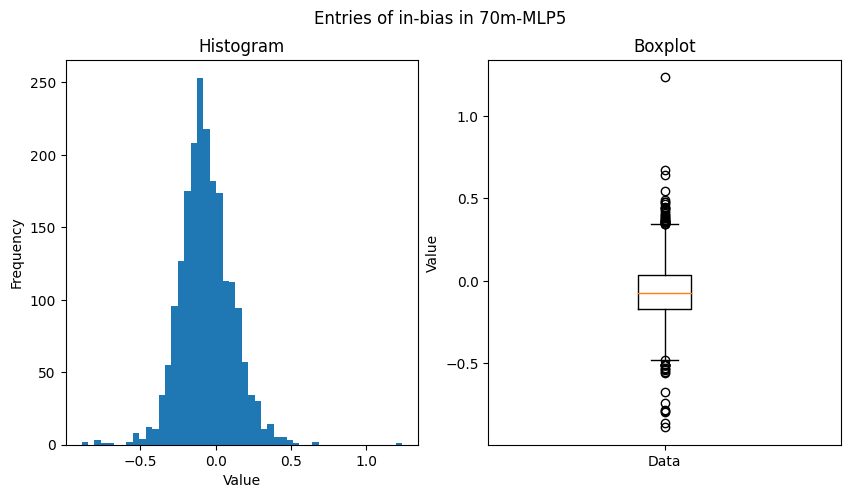

160m 0


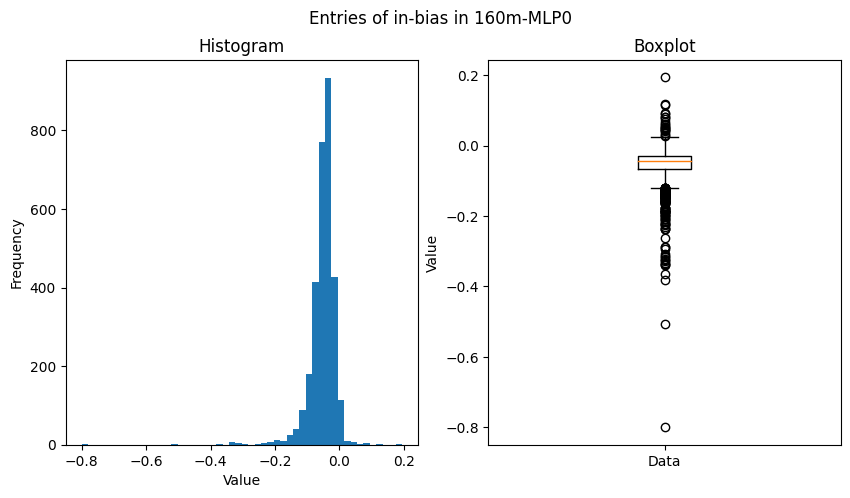

160m 1


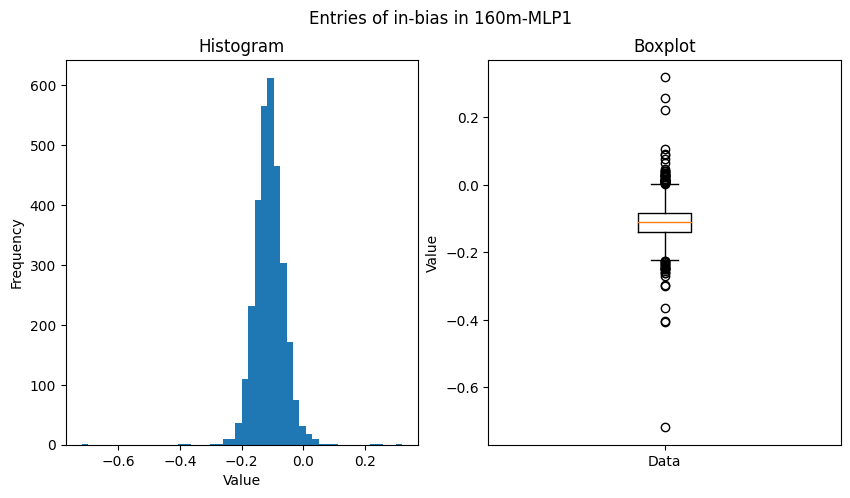

160m 2


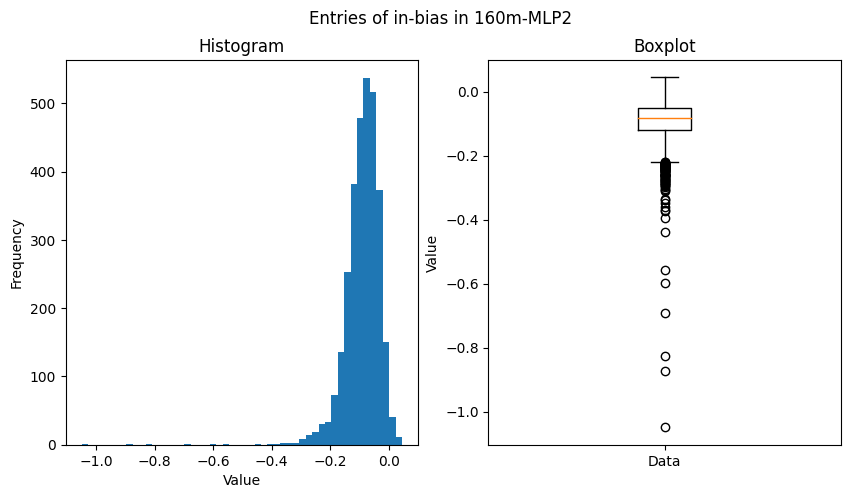

160m 3


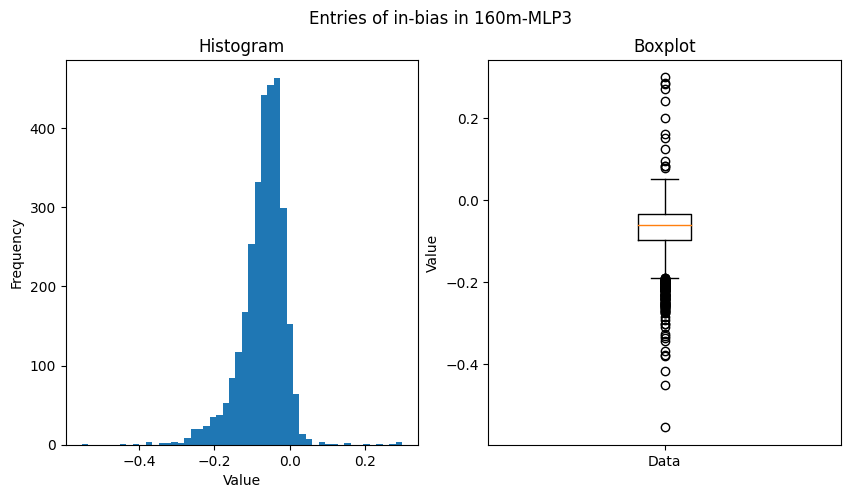

160m 4


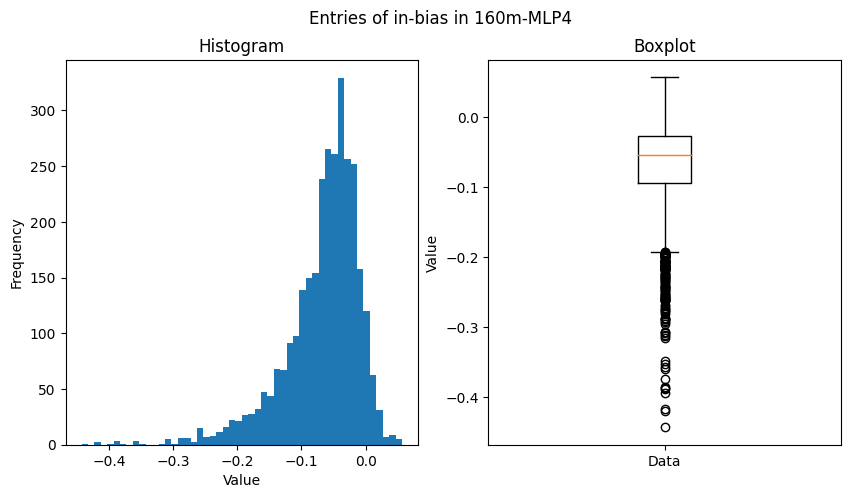

160m 5


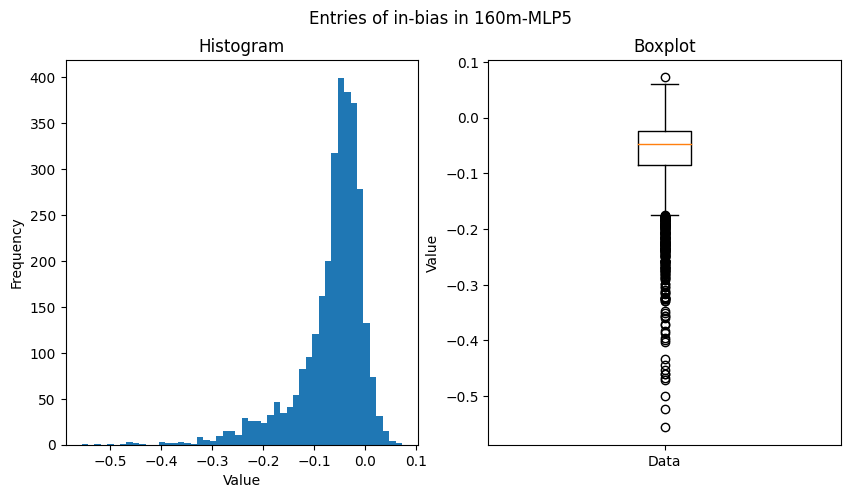

160m 6


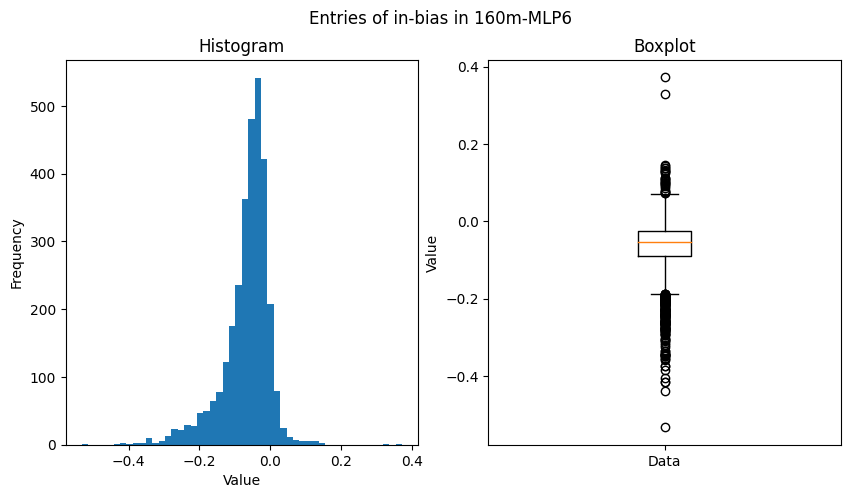

160m 7


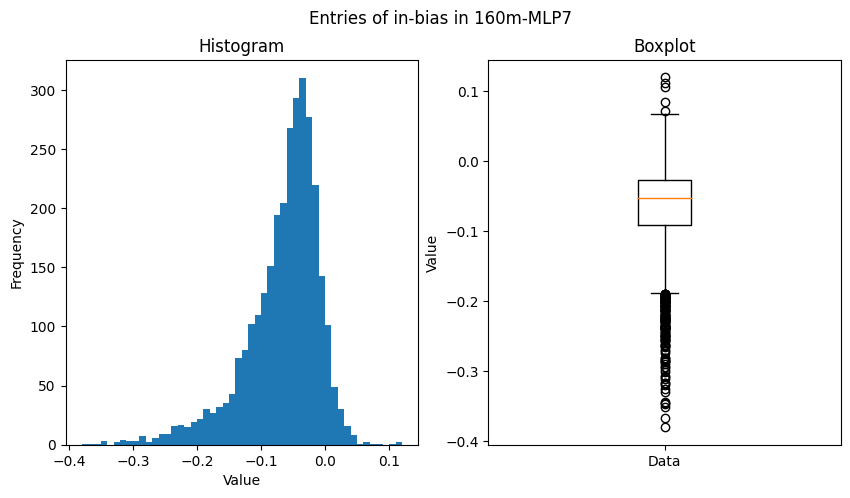

160m 8


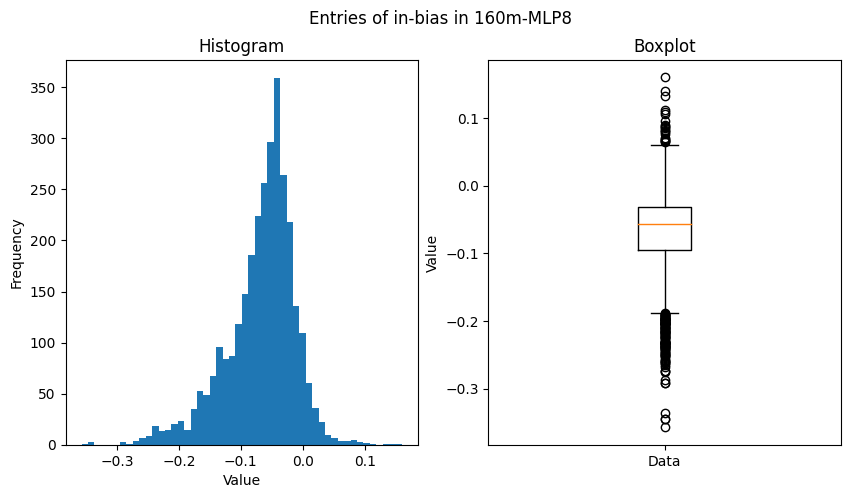

160m 9


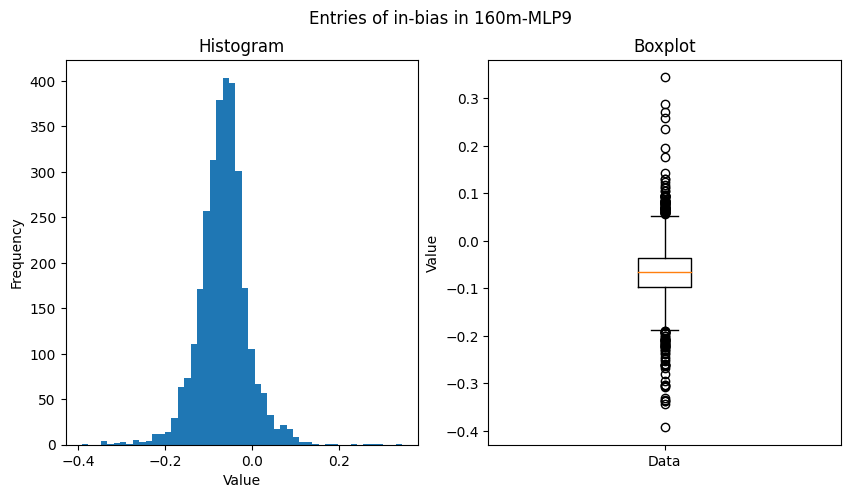

160m 10


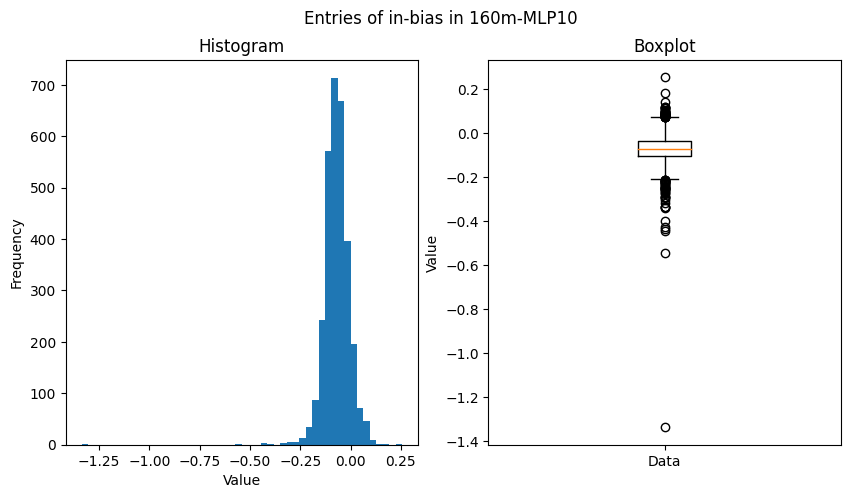

160m 11


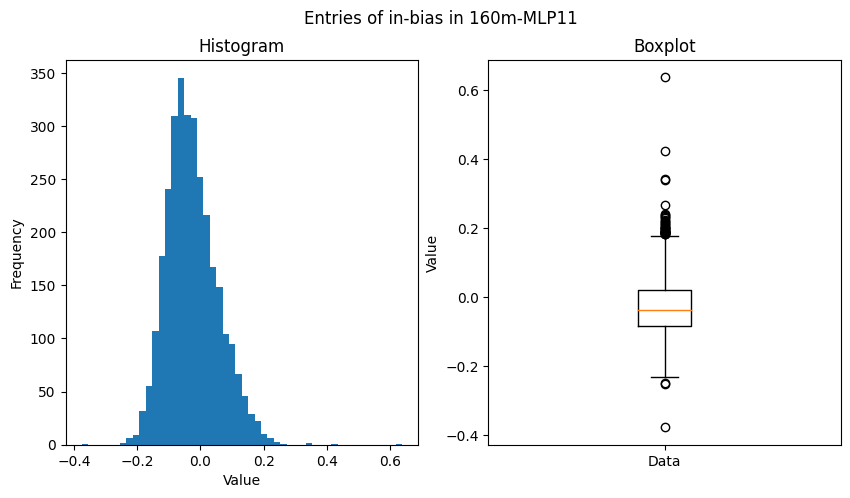

410m 0


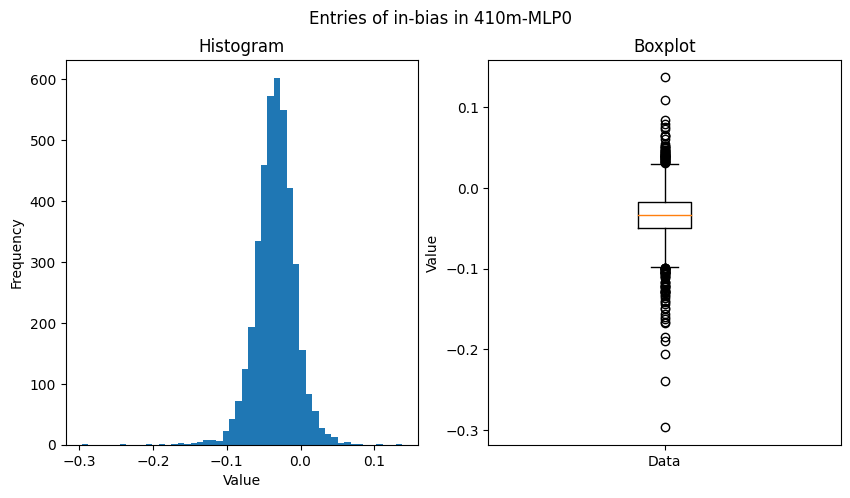

410m 1


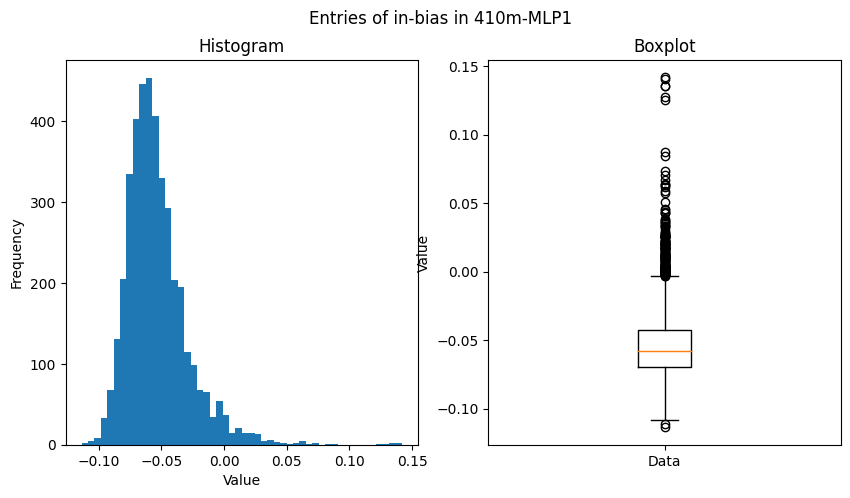

410m 2


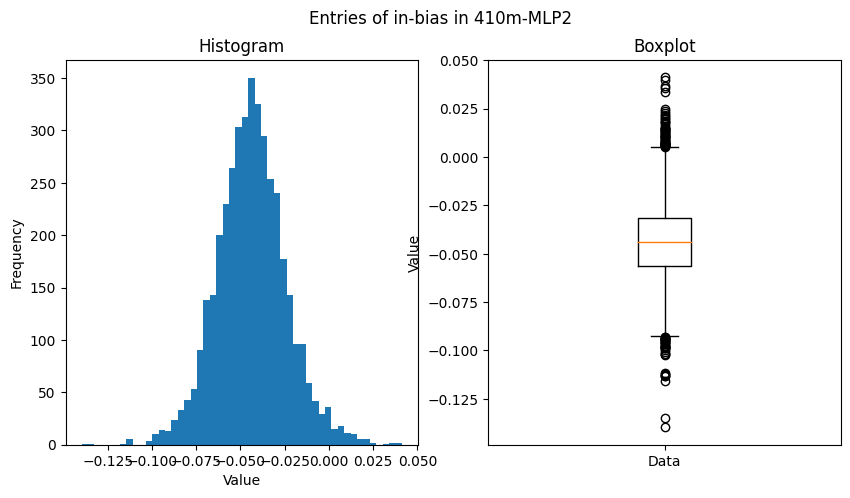

410m 3


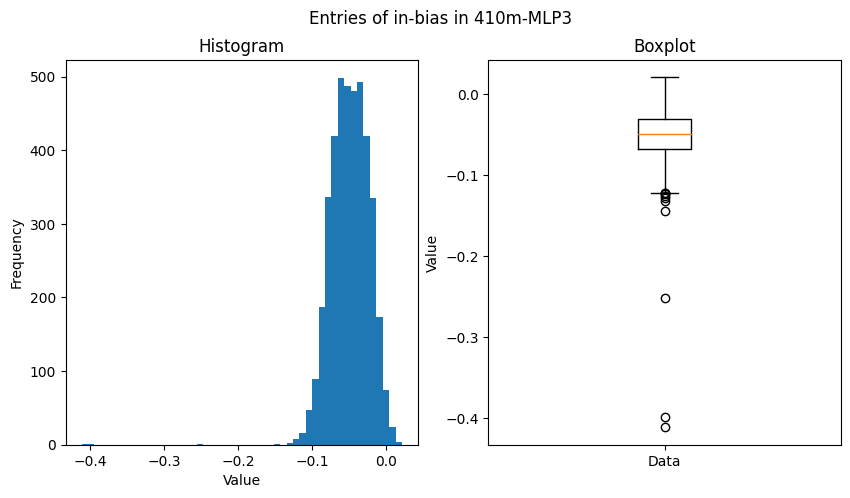

410m 4


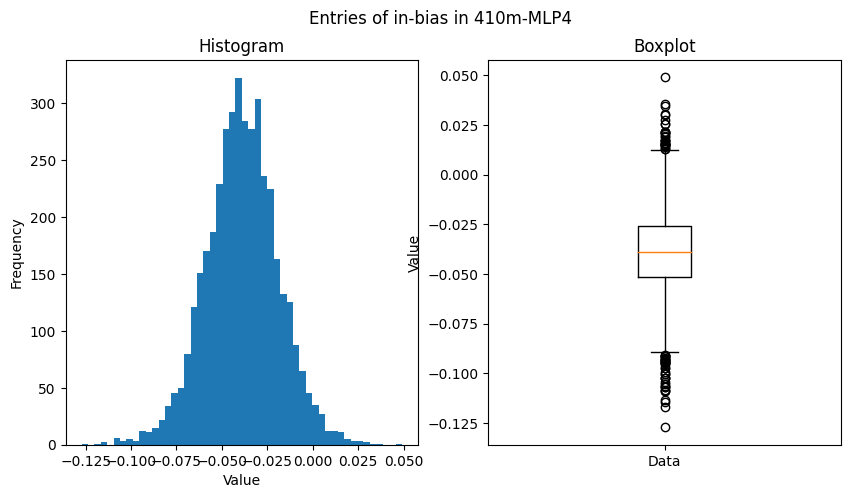

410m 5


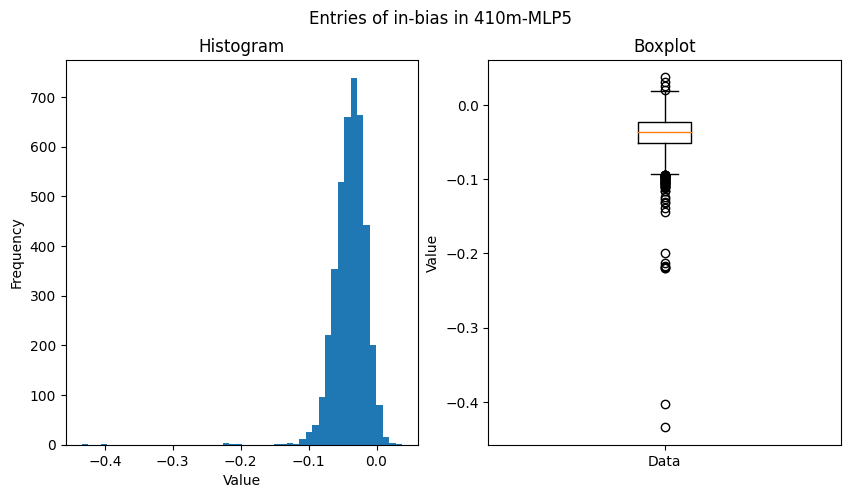

410m 6


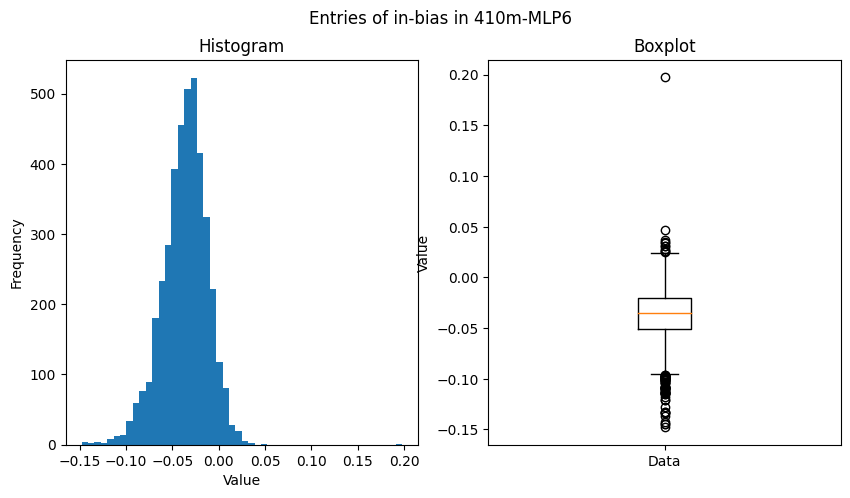

410m 7


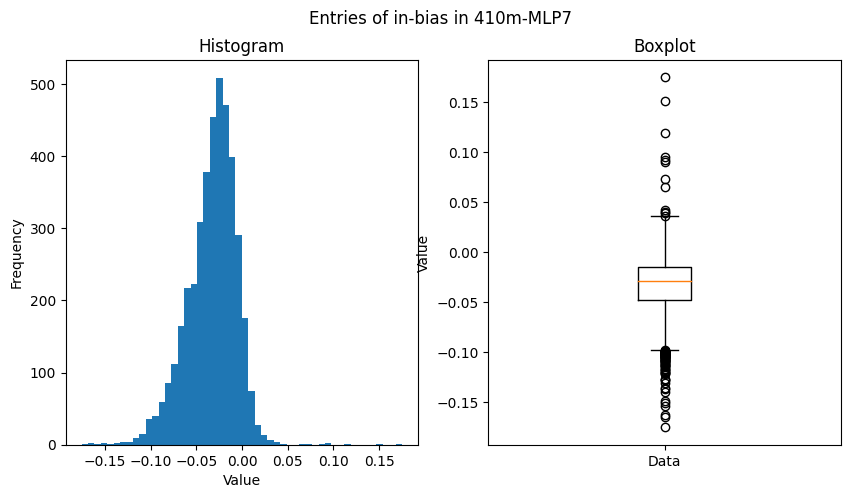

410m 8


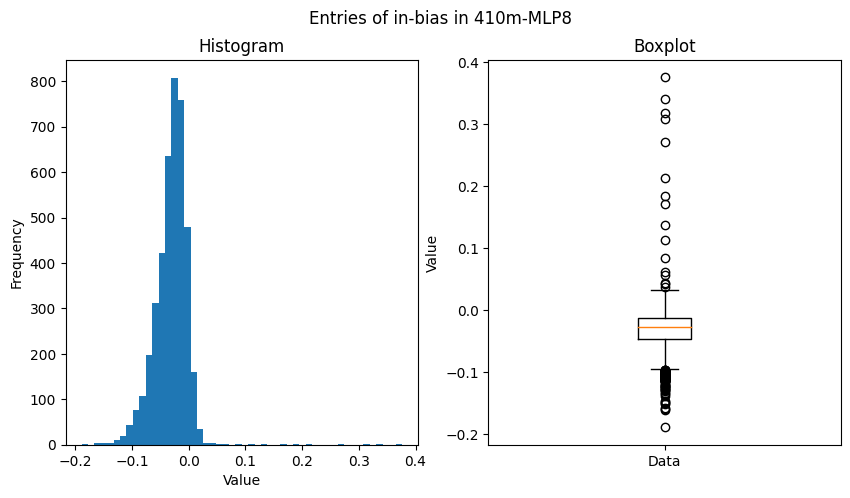

410m 9


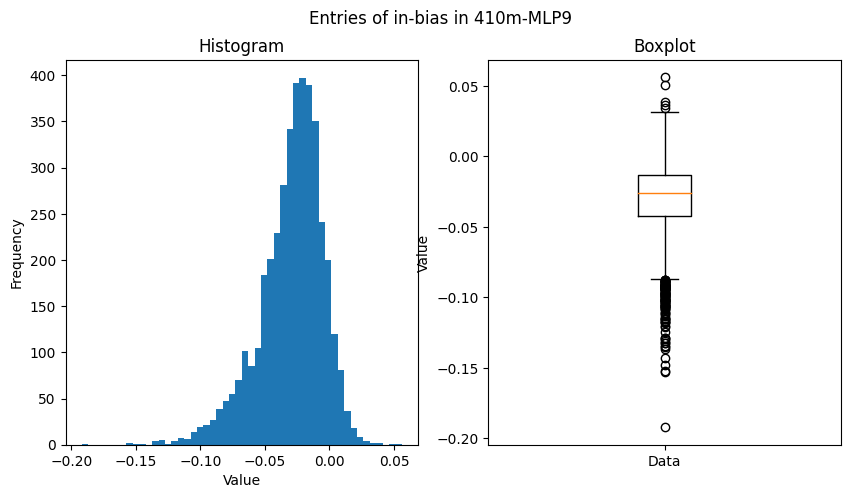

410m 10


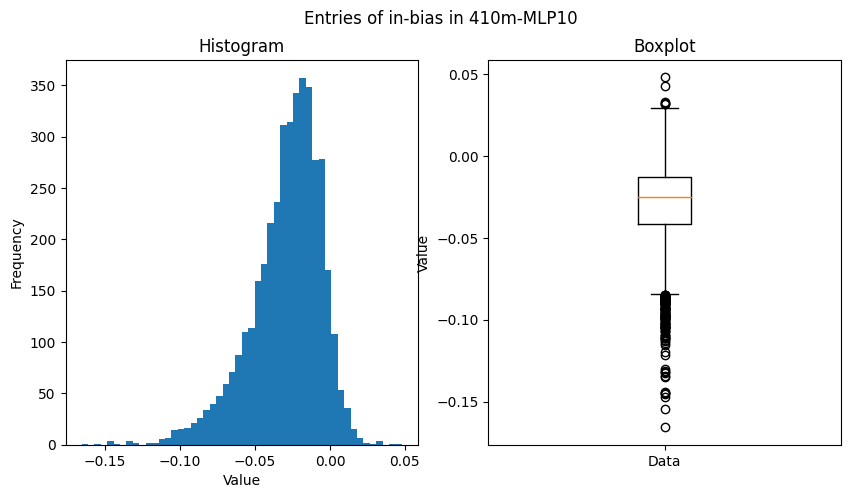

410m 11


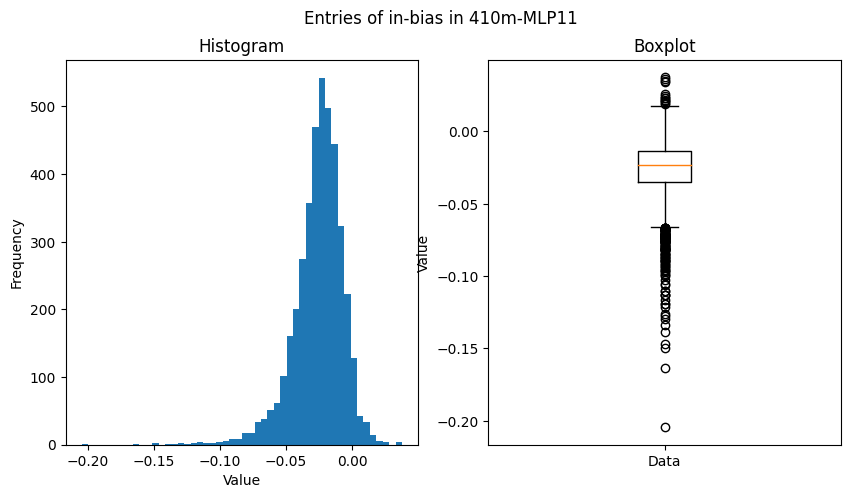

410m 12


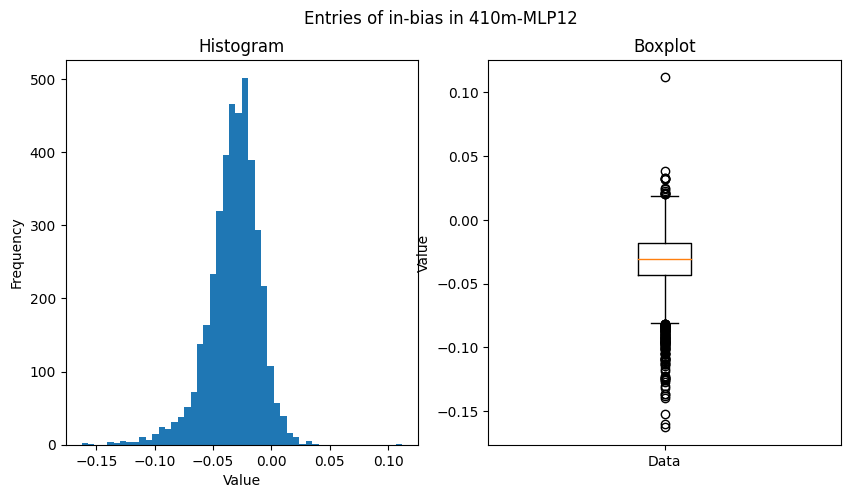

410m 13


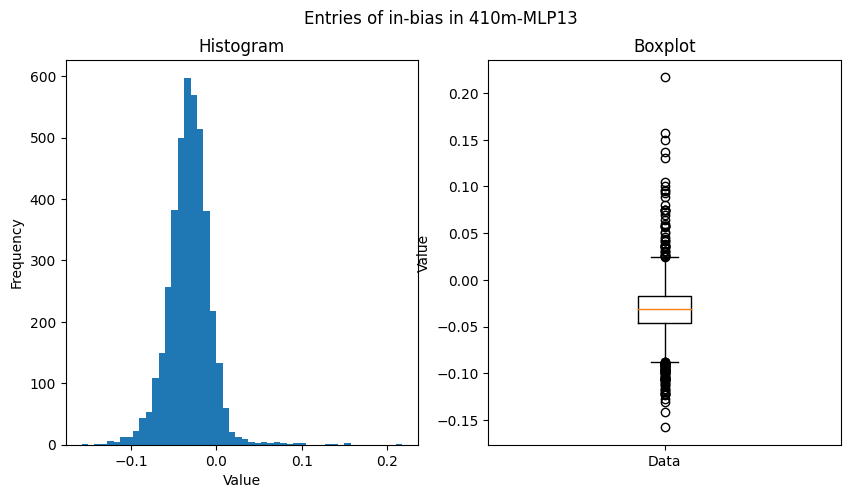

410m 14


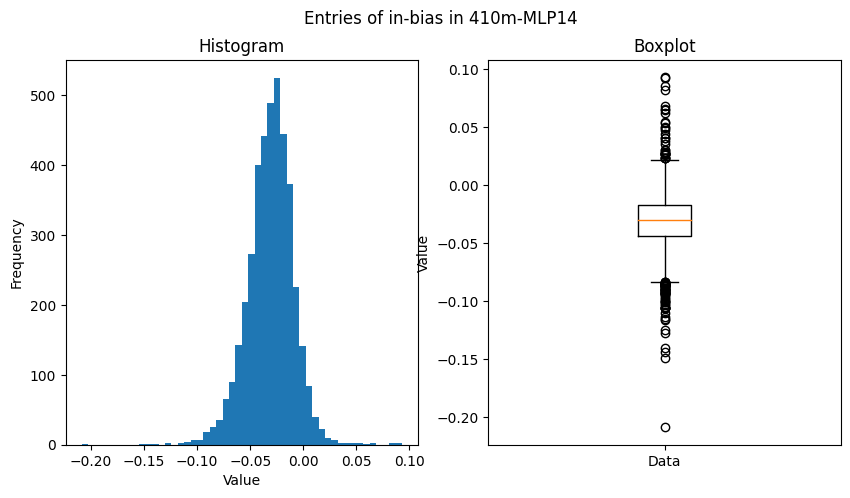

410m 15


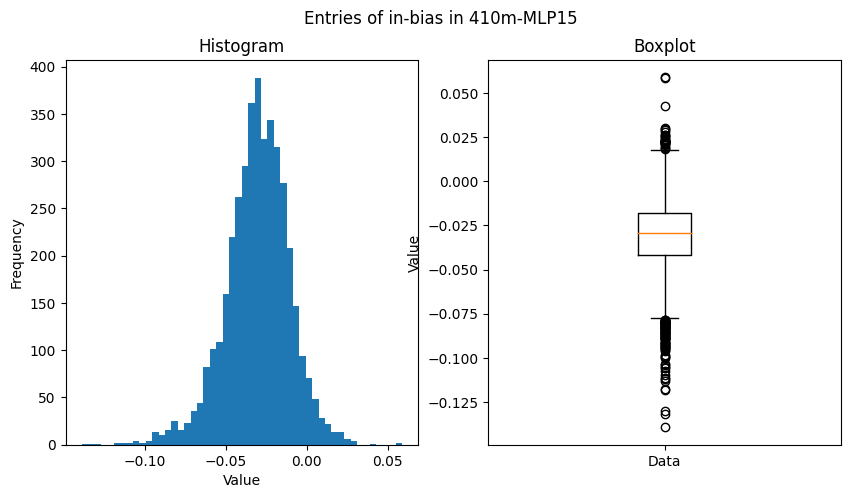

410m 16


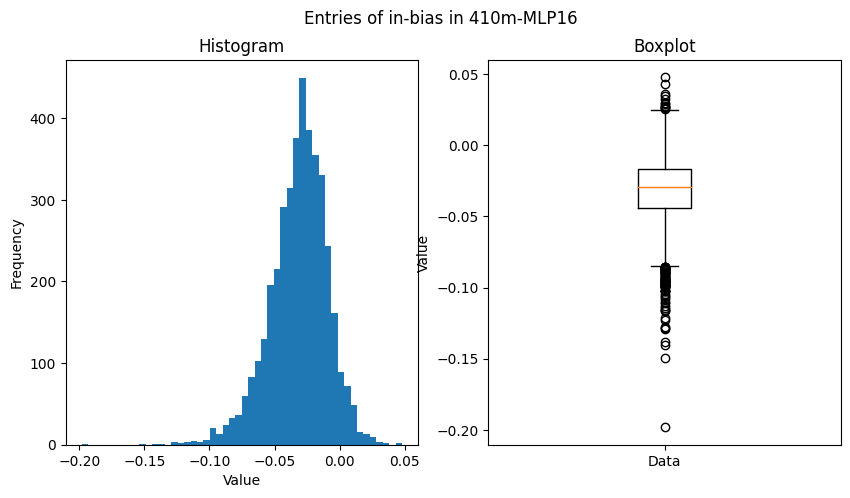

410m 17


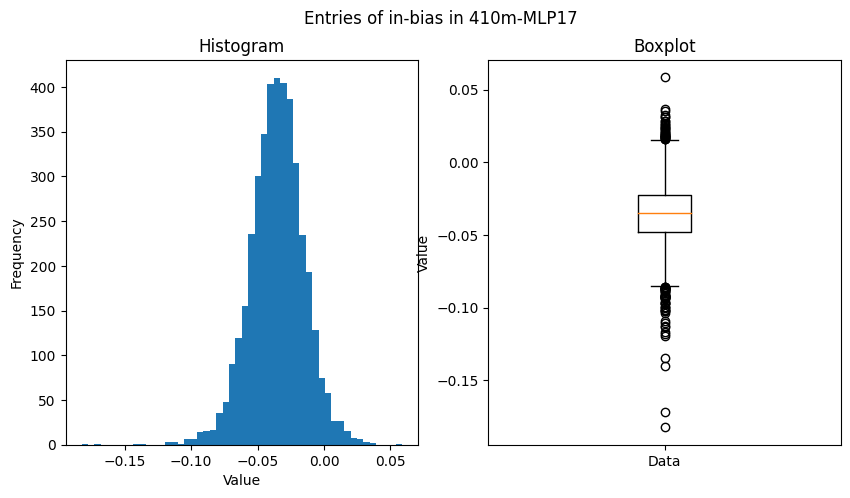

410m 18


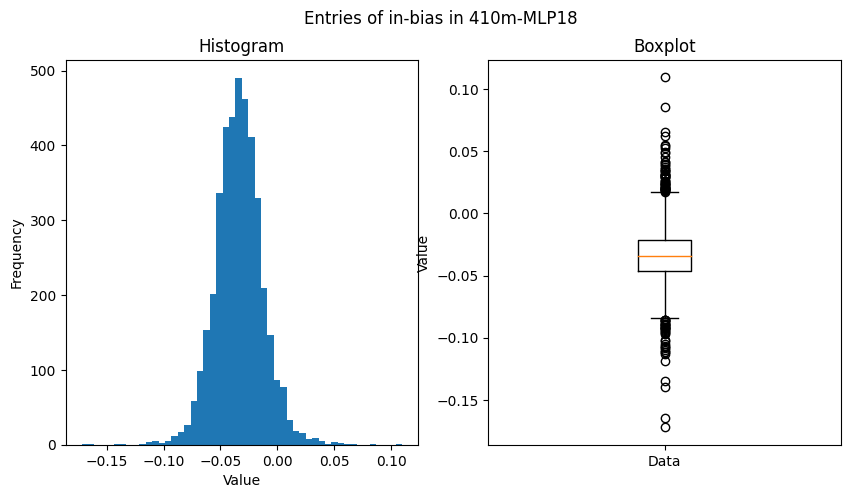

410m 19


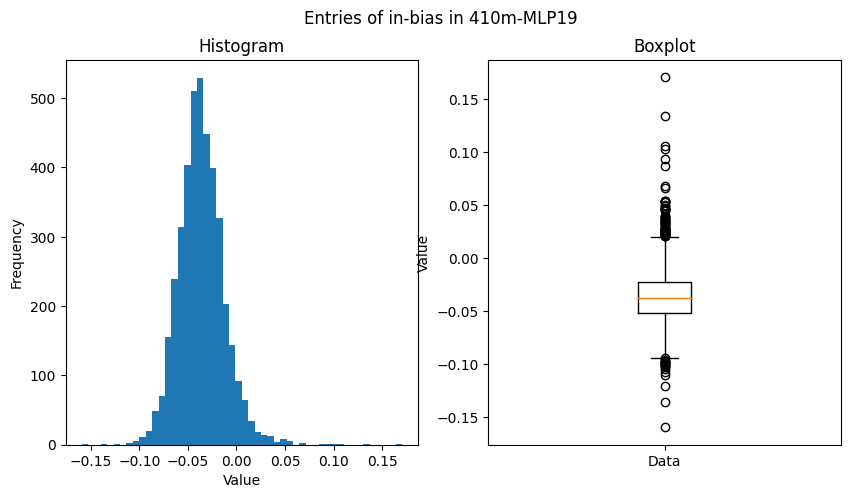

410m 20


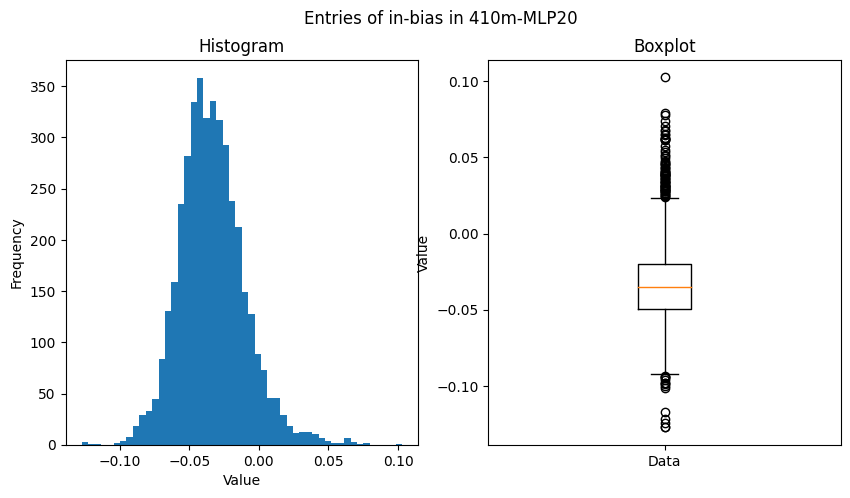

410m 21


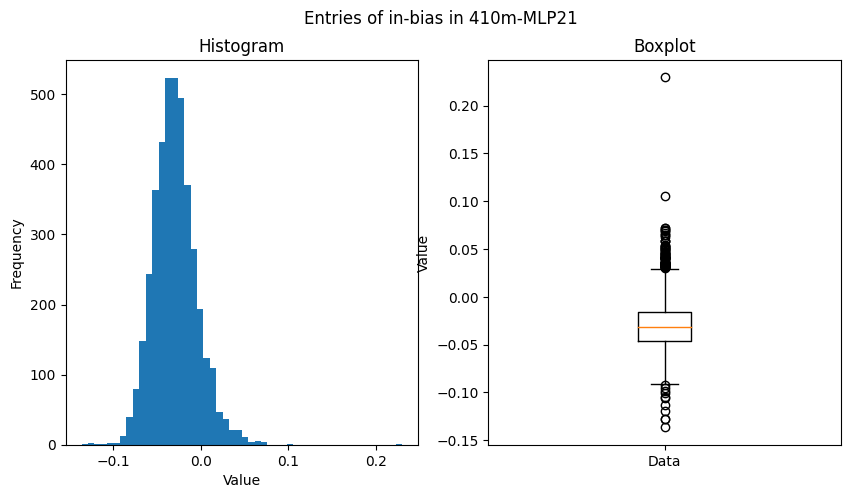

410m 22


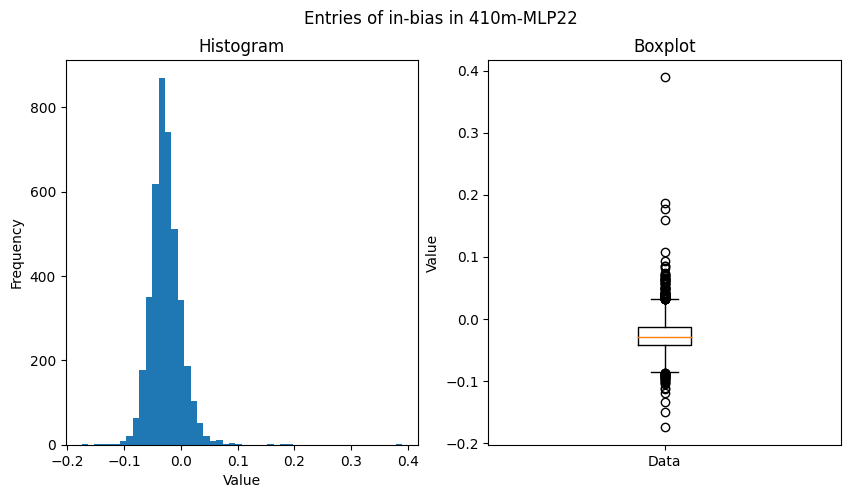

410m 23


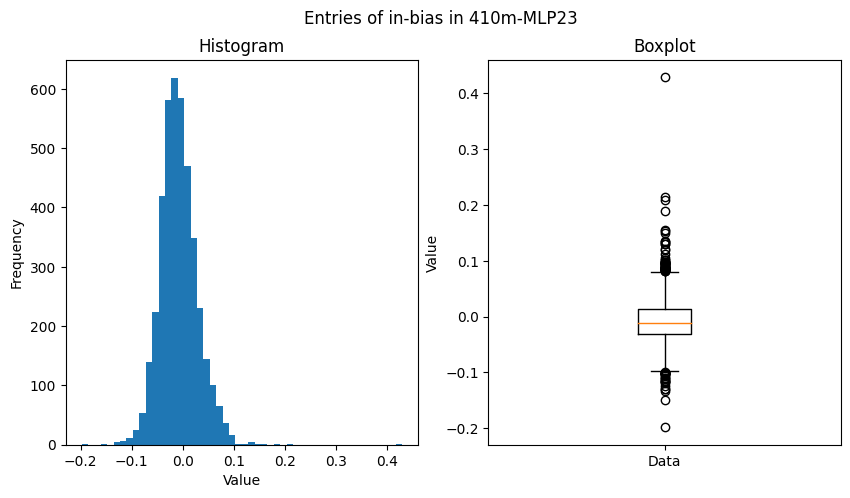

1b 0


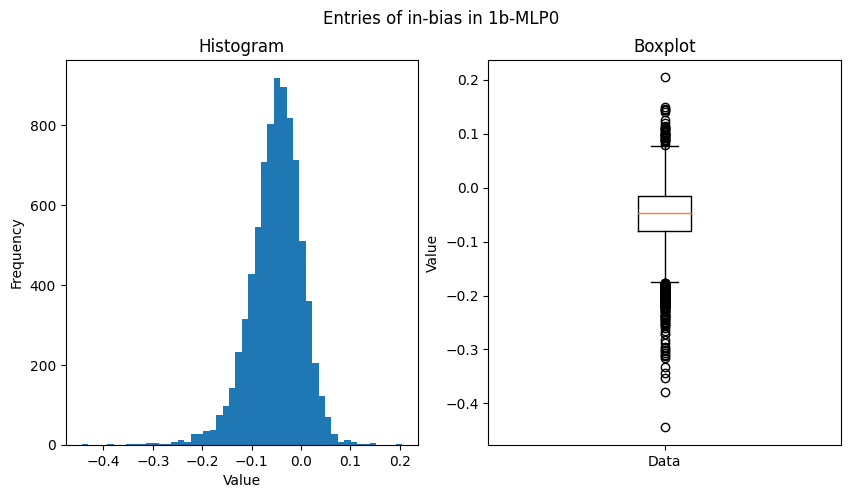

1b 1


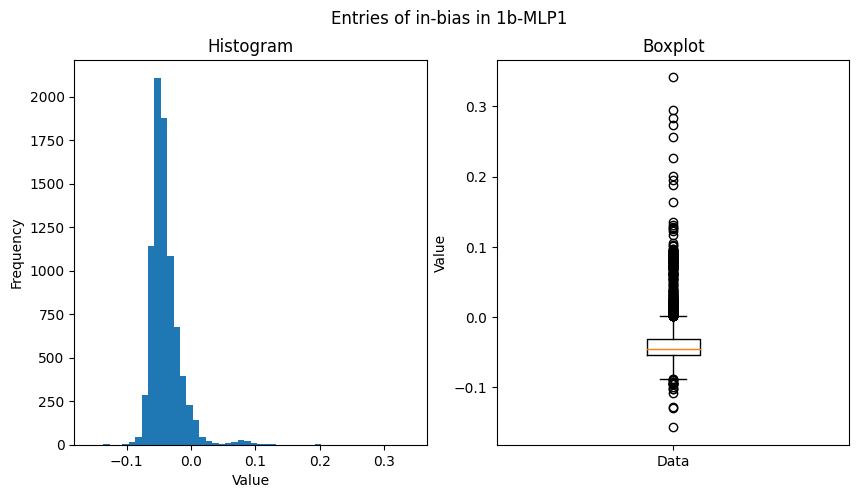

1b 2


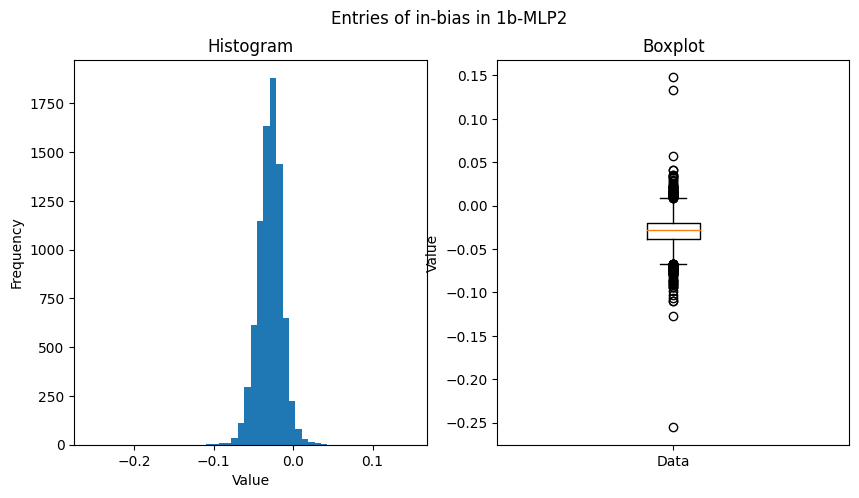

1b 3


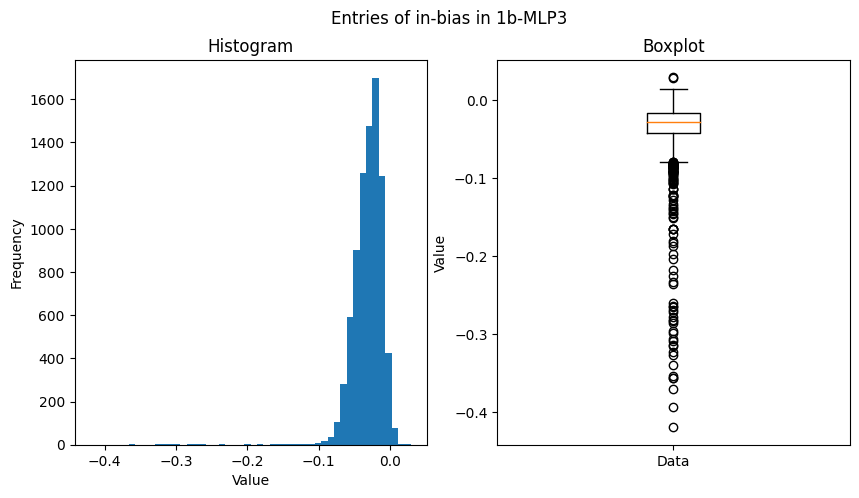

1b 4


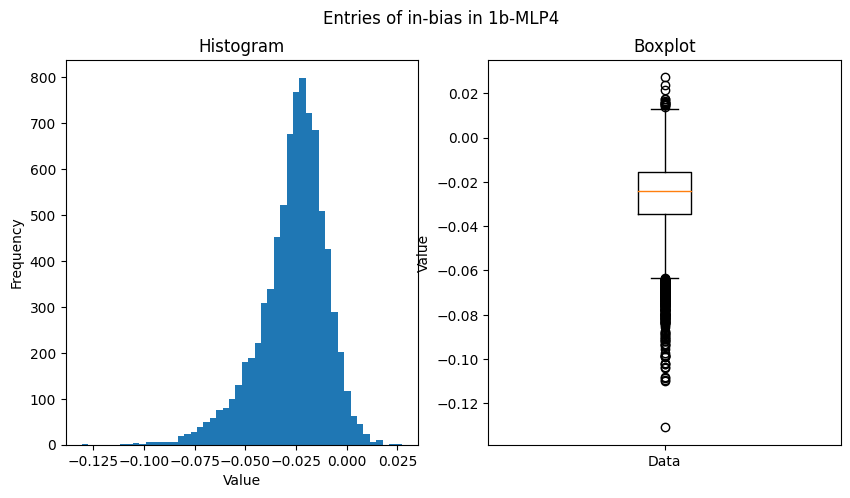

1b 5


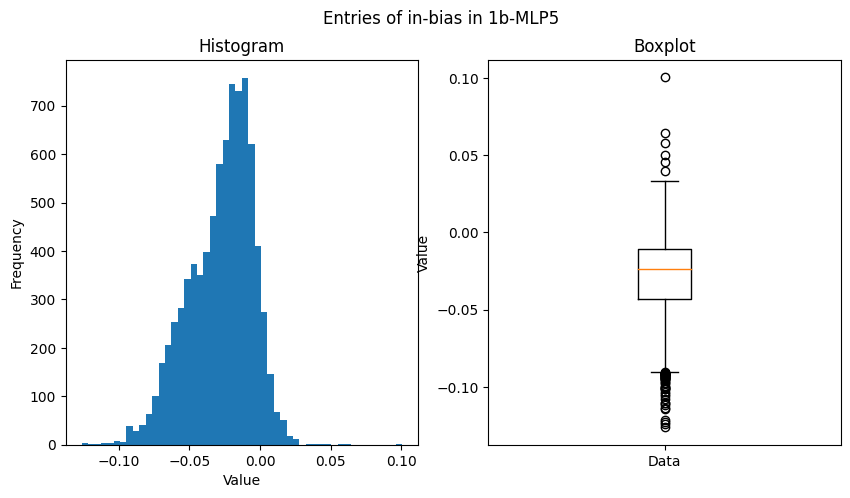

1b 6


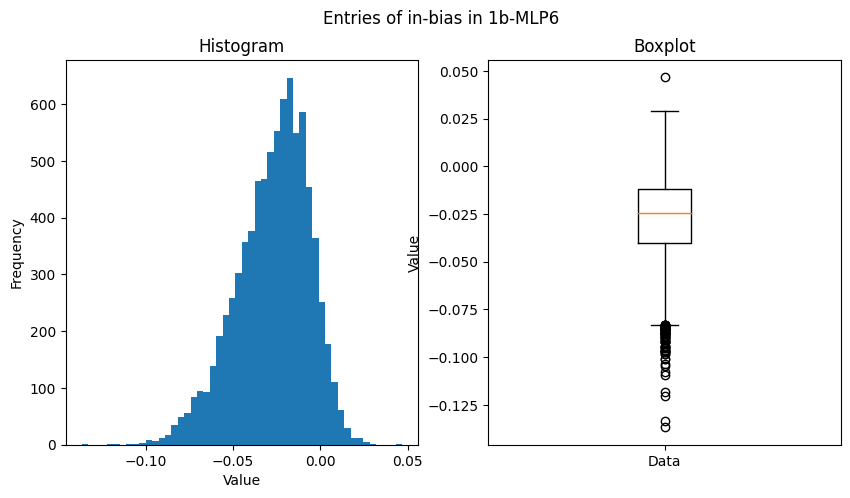

1b 7


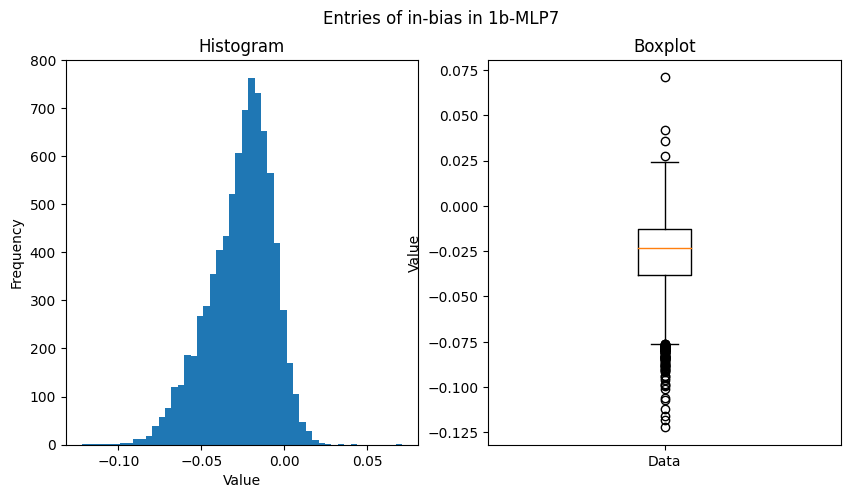

1b 8


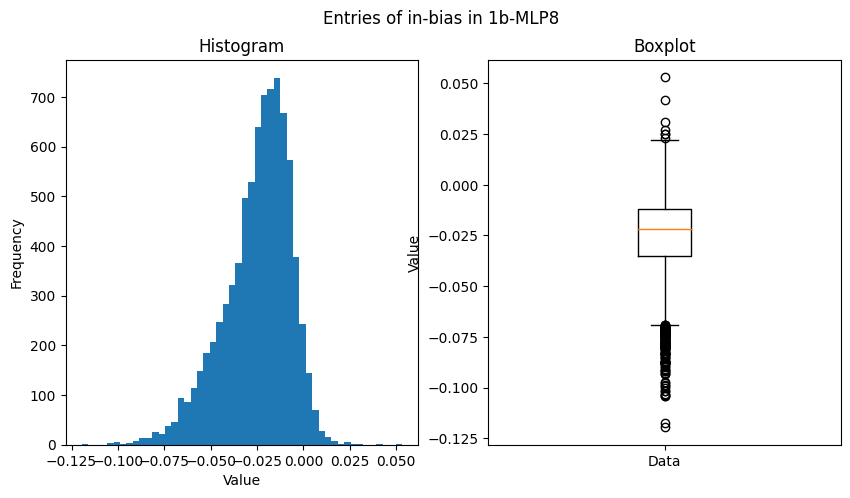

1b 9


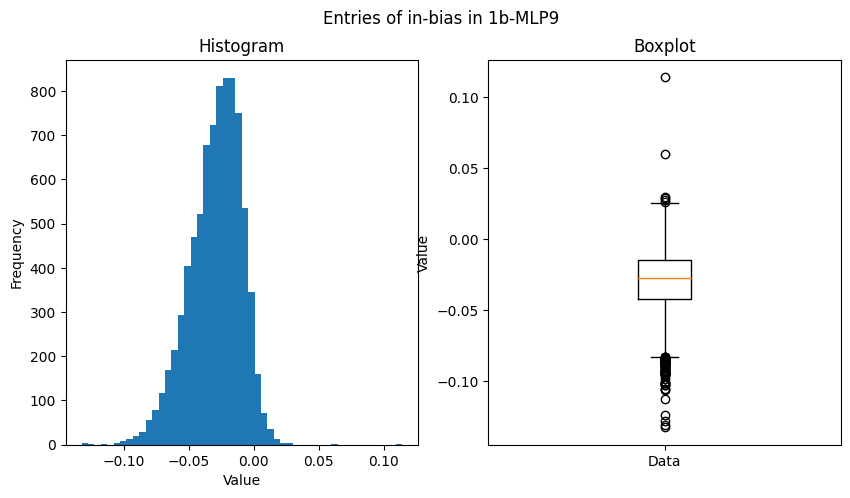

1b 10


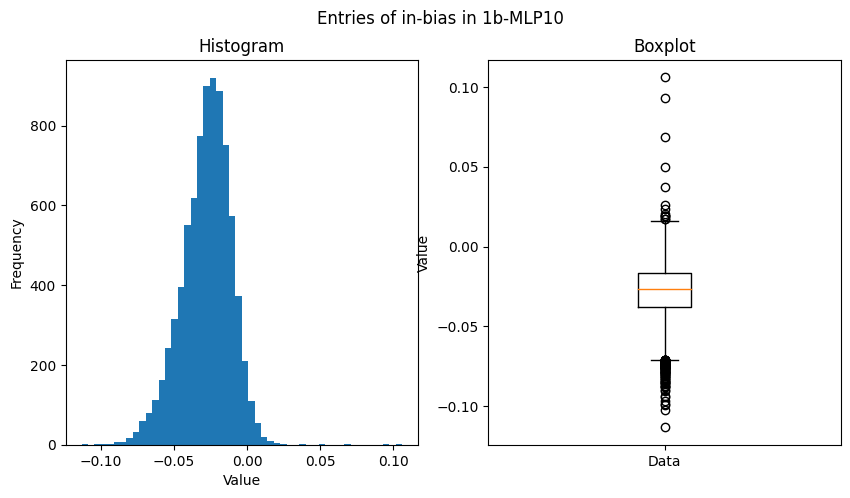

1b 11


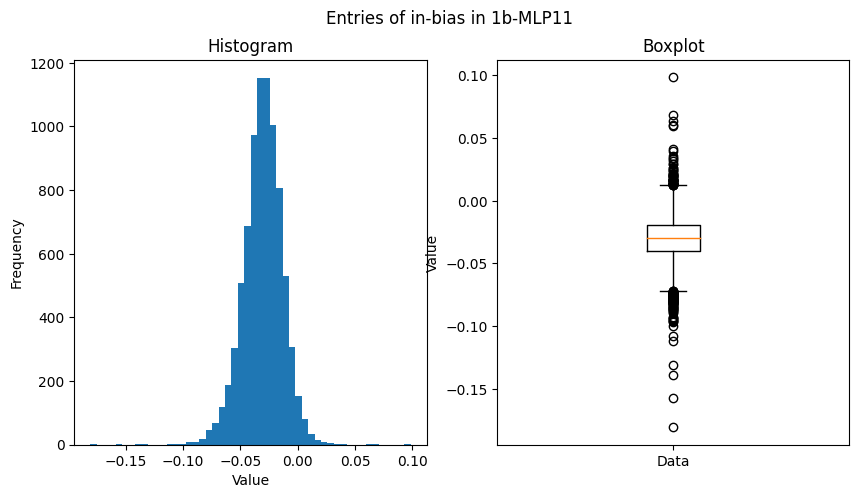

1b 12


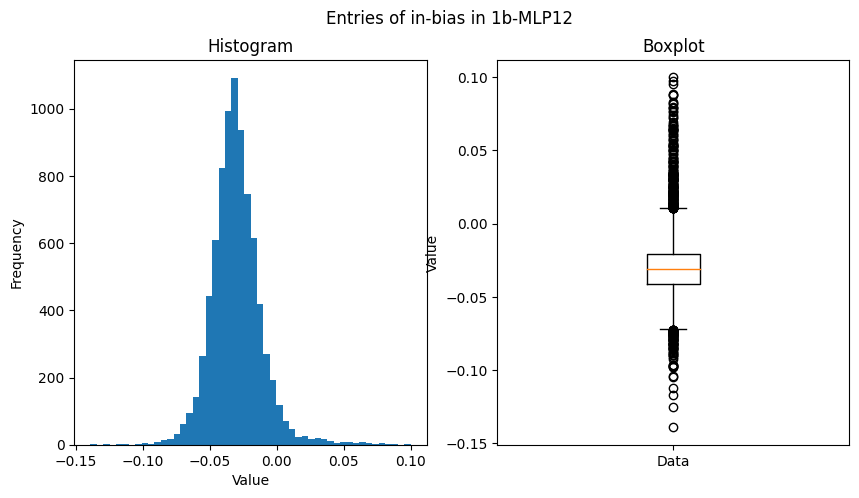

1b 13


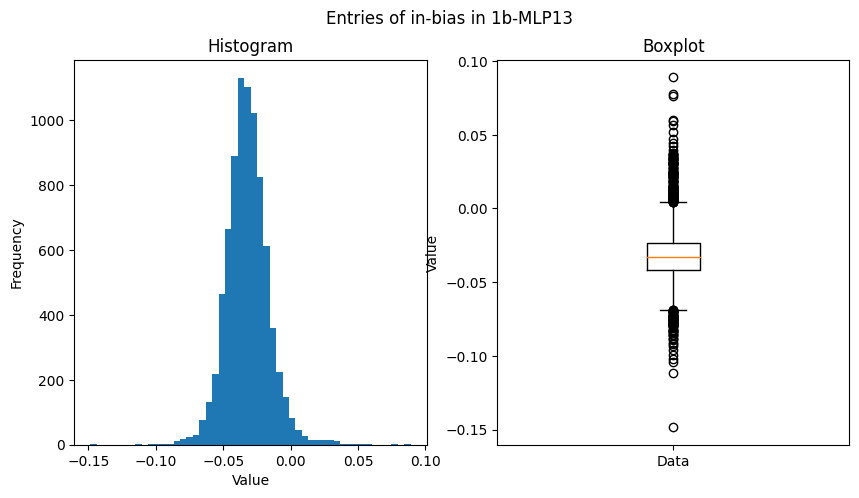

1b 14


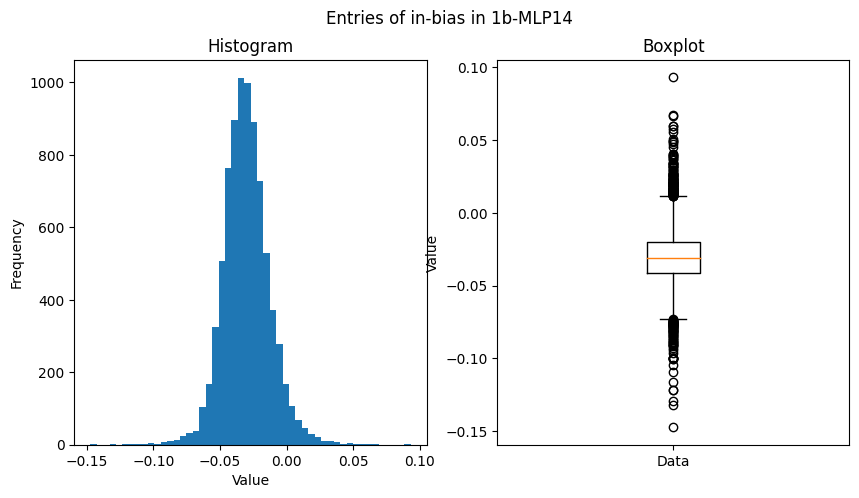

1b 15


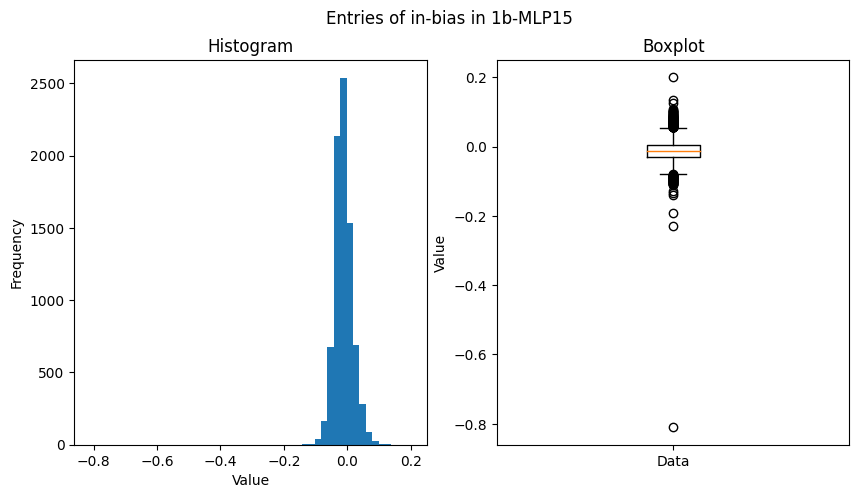

In [16]:
model_names = ['70m', '160m', '410m', '1b']
def yield_models(lens=False):
    for model_name in model_names:
        model = get_model(model_name, 143, lens)
        yield (model_name, model)
for model_name, model in yield_models():
  for layer_id in range(get_n_layers(model)):
    print(model_name, layer_id)
    b_in = model.gpt_neox.layers[layer_id].mlp.dense_h_to_4h.bias.detach()
    hist_and_box(b_in, title=f'Entries of in-bias in {model_name}-MLP{layer_id}', save_filename=f'plots/mlp_in_bias_{model_name}-{layer_id}.png')

In [18]:
import os
import zipfile

def create_zip_archive(input_dir, output_path):
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(input_dir):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, input_dir))


In [20]:
create_zip_archive('/content/plots', '/content/mlp_in_plots.zip')

In [21]:
# Generate the Markdown file
with open("plots_in_bias.md", "w") as f:
  for model_name, model in yield_models():
    for layer_id in range(get_n_layers(model)):
      f.write(f"![Layer {layer_id} Plots](plots/mlp_in_bias_{model_name}-{layer_id}.png)\n\n")